In [133]:
import numpy as np
import math
import g2o
import matplotlib.pyplot as plot


In [134]:
optimizer = g2o.SparseOptimizer()
optimizer.load("/home/$U/Downloads/g2o_old/g2o/trunk/data/2d/intel/intel.g2o")

print('num vertices:', len(optimizer.vertices()))
print('num edges:', len(optimizer.edges()), end='\n\n')

num vertices: 943
num edges: 1837



In [135]:
v = optimizer.vertices()
edge = optimizer.edges()

print(v[1].estimate().translation()[0])

print(v[1].estimate().rotation().angle())

-0.122754
-3.07786


<IPython.core.display.Javascript object>


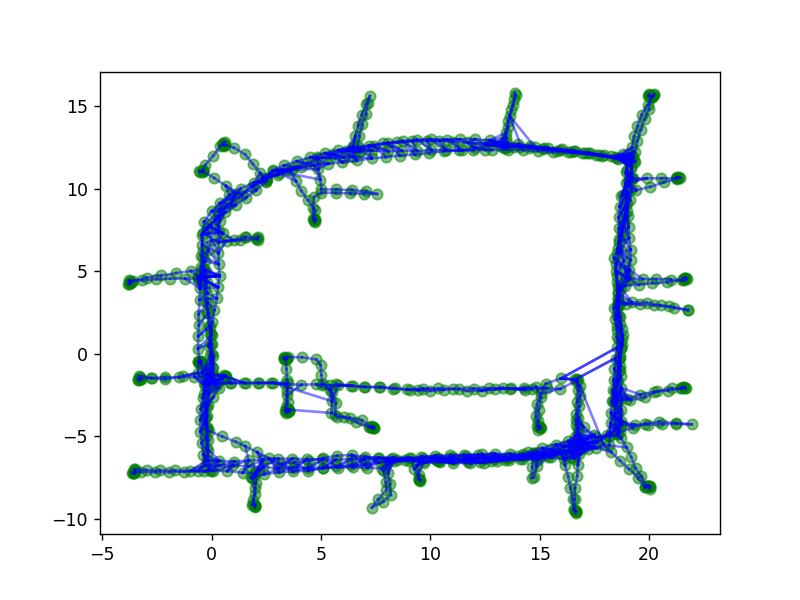

In [148]:
poses = np.array([v[0].estimate().translation()[0], v[0].estimate().translation()[1]])
for i in range(len(v)-1):
    poses = np.vstack((poses, [v[i+1].estimate().translation()[0], v[i+1].estimate().translation()[1]]))
    
%matplotlib notebook

#plot.figure()
plot.plot(poses[:, 0], poses[:, 1], 'o', label="Original", alpha=0.5, color="green")

for e in edge:
    plot.plot([e.vertex(0).estimate().translation()[0], e.vertex(1).estimate().translation()[0]], [e.vertex(0).estimate().translation()[1], e.vertex(1).estimate().translation()[1]], alpha=0.5, color="blue")
